In [ ]:
!pip install numpy==1.26.4

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


# Web Scraping a dataset of Top Banned Books

By [Crystal Shearer](https://grrlofhighart.github.io/)

This notebook will outline the steps I took to compile a dataset of top banned books from [Goodreads](https://www.Goodreads.com). My original intention was to utilize a readily available dataset from a website such as [Kaggle](https://www.kaggle.com). However, after some searching it seemed like all the available datasets were either outdated or lacking some of the data points I was hoping to utilize. My solution was to attempt compiling my own data.

### Step 1: Importing all the necessary Libraries

In [3]:
# Import the required modules
import numpy as np

# pandas for data cleaning and manipulation
import pandas as pd

# BeautifulSoup for navigating webdata
from bs4 import BeautifulSoup

# requests for making http requests (webscraping)
import requests

# re for working with regular expressions (strings)
import re

# sqlite3 for storage of the dataset
import sqlite3
from contextlib import closing

### Step 2: Setting up the Database

I plan on collecting multiple datasets throughout this project. To keep everything uniform I decided to store my data in a sql database.

In [7]:
# Setup SQLite Database
database = 'Book_DB.db'
conn = sqlite3.connect(database)
c = conn.cursor()

### Step 3: Setting scrape parameters

I found a list on Goodreads Listopia called 'Best Banned, Censored, and Challenged Books'. According to the list description, the list is comprised of "books that have at one point either been banned, censored, or requested for removal from libraries". The list contains over 700 books which I am sure includes many, if not all, of the books from the ALA Top Banned Books lists. Lists on Goodreads only display 100 books per page, so there are at least 8 pages that need to be scraped.

In [ ]:
# Set base url, number of pages to scrape
# Add header to avoid being blocked by website
base_url = 'https://www.goodreads.com/list/show/1360.Best_Banned_Censored_and_Challenged_Books?page='
pages = 8
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
    }

### Step 4: Scraping the list

In [ ]:
# Setup empty list to store data
TopBannedBooks = []

In [ ]:
# Use a for loop to scrape all books from the List pages
for page_num in range(1, pages + 1):
    BannedList = {}
    # Construct the URL for the current page
    URL = base_url + str(page_num)

    # Send a GET request to the URL
    response = requests.get(URL, headers=header)

    BannedBooks  = (response).content

    ## Grabbing all tags in webpage of 'a' type and class 'bookTitle'
    soup = BeautifulSoup(BannedBooks,"lxml")
    block = soup.select('a.bookTitle')

    ## Iterating through and creating list for all titles (bookT) and links (bookLink)
    bookT = [x.text.strip() for x in block]
    bookLink = ['https://www.goodreads.com'+ x.get('href') for x in block]

    ## Combining list
    col_stack = np.column_stack((bookT, bookLink))
    # TopBannedBooks = pd.DataFrame(con, columns = ['Book Title', 'Book Link'])
    # BannedList = [bookT, bookLink]
    TopBannedBooks.append(col_stack)

In [ ]:
# Create DataFrame
df = pd.DataFrame(np.concatenate(TopBannedBooks), columns = ['Book Title', 'Book Link'])
BookID = [re.search('\d+', i)[0] for i in df['Book Link']]
df['Book ID'] = BookID

In [ ]:
# Review DataFrame
df.head()

,Book Title,Book Link,Book ID
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Ki...,2657
1,Harry Potter and the Sorcerer's Stone (Harry P...,https://www.goodreads.com/book/show/3.Harry_Po...,3
2,1984,https://www.goodreads.com/book/show/61439040-1984,61439040
3,Animal Farm,https://www.goodreads.com/book/show/7613.Anima...,7613
4,Fahrenheit 451,https://www.goodreads.com/book/show/13079982-f...,13079982


In [ ]:
# Export copy of DataFrame to database
# df.to_sql(name='goodreads_list', con=conn, if_exists='append', index=False)
# If not using sqlite you can also export a copy to csv
df.to_csv('goodreads_list.csv', index=False)

In [ ]:
# Isolate the Book ID column in the dataframe
# Keep only unique values and create a list
bookIDs = df['Book ID'].unique()
bookIDs = df['Book ID'].tolist()

In [ ]:
# Export the list of ID's to a text file to use for scraping the remaing book data
with open('book_IDs.txt', 'w') as f:
    for item in bookIDs:
        f.write(f"{item}\n")

### Step 5: Collect the Book Data

Before scraping make a new folder to store all the output files. Make sure you are in the correct directory, then type the code below into the command line. If using VS Code, select the code below then go to Terminal, Run Selected Text.

In [ ]:
!mkdir banned_book_data

To start scraping run the `get_book_data.py` script in the command line (or Terminal). Direct it to place output files in the folder `/banned_book__data` and set the file format of the compiled book data to CSV.

In [ ]:
!python /content/get_book_data.py --book_ids_path books.txt --output_directory_path /content/banned_book_data --format csv

2024-08-04 12:34:33.045176 get_book_data.py: Scraping 1618...
2024-08-04 12:34:33.045219 get_book_data.py: #1 out of 34 books
2024-08-04 12:35:10.792354 get_book_data.py: Scraping 7445...
2024-08-04 12:35:10.792389 get_book_data.py: #2 out of 34 books
2024-08-04 12:35:48.053457 get_book_data.py: Scraping 11337...
2024-08-04 12:35:48.053488 get_book_data.py: #3 out of 34 books
2024-08-04 12:36:25.988652 get_book_data.py: Scraping 18579...
2024-08-04 12:36:25.988690 get_book_data.py: #4 out of 34 books
2024-08-04 12:36:30.738945 get_book_data.py: Scraping 22628...
2024-08-04 12:36:30.738978 get_book_data.py: #5 out of 34 books
2024-08-04 12:37:11.477506 get_book_data.py: Scraping 41865...
2024-08-04 12:37:11.477543 get_book_data.py: #6 out of 34 books
2024-08-04 12:37:48.841756 get_book_data.py: Scraping 49746...
2024-08-04 12:37:48.841794 get_book_data.py: #7 out of 34 books
2024-08-04 12:38:01.103212 get_book_data.py: Scraping 170529...
2024-08-04 12:38:01.103242 get_book_data.py: #8 o

In [8]:
# Import table from sql database as dataframe
query = 'SELECT * FROM all_books'
df = pd.read_sql(sql=query, con=conn)

# Preview dataframe
df.head()

DatabaseError: Execution failed on sql 'SELECT * FROM all_books': no such table: all_books

In [1]:
# For the bar chart visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# For the map visualization
import folium


In [ ]:
num_vars = all_book_data.columns[all_book_data.dtypes != 'object']
cat_vars = all_book_data.columns[all_book_data.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['book_id_title', 'book_id', 'year_first_published', 'num_pages',
       'average_rating'],
      dtype='object')
Index(['cover_image_uri', 'book_title', 'book_series', 'book_series_uri',
       'top_5_other_editions', 'isbn', 'isbn13', 'authorlink', 'author',
       'genres', 'shelves', 'lists', 'num_ratings', 'num_reviews',
       'rating_distribution', 'reviews_page'],
      dtype='object')


In [ ]:
all_book_data[num_vars].isnull().sum().sort_values(ascending=False)

,0
book_id_title,0
book_id,0
num_pages,0
average_rating,0


In [ ]:
all_book_data[cat_vars].isnull().sum().sort_values(ascending=False)

,0
book_series,90
book_series_uri,84
reviews_page,2
genres,0
rating_distribution,0
num_reviews,0
num_ratings,0
lists,0
shelves,0
cover_image_uri,0


In [ ]:
all_book_data['num_reviews'] = all_book_data['num_reviews'].replace(',', '', regex=True)
all_book_data['num_ratings'] = all_book_data['num_ratings'].replace(',', '', regex=True)

# all_book_data

In [ ]:
all_book_data['year_first_published'] = all_book_data['year_first_published'].replace('-', '', regex=True)

In [ ]:
all_book_data.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,"['Graphic Novels', 'Comics', 'Fiction', 'Graph...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,"May 25, 2011",...,E.L. James,356,"['Romance', 'Fiction', 'Erotica', 'BDSM', 'Adu...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,NaN,NaN,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,"April 6, 2004",...,Jodi Picoult,423,"['Fiction', 'Chick Lit', 'Young Adult', 'Drama...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,"July 11, 2011",...,Jaycee Dugard,273,"['Nonfiction', 'Memoir', 'True Crime', 'Biogra...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,"July 11, 2011",...,Jaycee Dugard,273,"['Nonfiction', 'Memoir', 'True Crime', 'Biogra...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...


In [ ]:
all_book_data['num_ratings'] = pd.to_numeric(all_book_data['num_ratings'], errors='coerce')
all_book_data['num_reviews'] = pd.to_numeric(all_book_data['num_reviews'], errors='coerce')
# all_book_data['isbn'] = pd.to_numeric(all_book_data['isbn'], errors='coerce')
# all_book_data['isbn13'] = pd.to_numeric(all_book_data['isbn13'], errors='coerce')

In [ ]:
all_book_data['year_first_published'] = pd.to_datetime(all_book_data['year_first_published'], format='%B %d, %Y', errors='coerce')
all_book_data.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,2011-09-01,...,Craig Thompson,672,"['Graphic Novels', 'Comics', 'Fiction', 'Graph...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,2011-05-25,...,E.L. James,356,"['Romance', 'Fiction', 'Erotica', 'BDSM', 'Adu...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,NaN,NaN,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,2004-04-06,...,Jodi Picoult,423,"['Fiction', 'Chick Lit', 'Young Adult', 'Drama...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,Jaycee Dugard,273,"['Nonfiction', 'Memoir', 'True Crime', 'Biogra...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,Jaycee Dugard,273,"['Nonfiction', 'Memoir', 'True Crime', 'Biogra...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...


In [ ]:
from ast import literal_eval

In [ ]:
df = all_book_data['shelves'].apply(pd.Series)
df

,to-read,graphic-novels,graphic-novel,comics,currently-reading,favorites,fiction,comics-graphic-novels,graphic-novels-comics,graphic,...,crime-thriller,conspiracy,suspense-thriller,detective,mystery-crime,thriller-suspense,brown-dan,france,john-green,boarding-school
0,48146.0,2455.0,1135.0,1132.0,636.0,526.0,505.0,172.0,156.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,715974.0,NaN,NaN,NaN,51995.0,6045.0,4411.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335130.0,NaN,NaN,NaN,8931.0,4775.0,6828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111068.0,NaN,NaN,NaN,4090.0,237.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111062.0,NaN,NaN,NaN,4094.0,237.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6526.0,18.0,11.0,12.0,41.0,98.0,152.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,141765.0,5800.0,3589.0,1886.0,2540.0,2100.0,545.0,403.0,366.0,467.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,5912.0,NaN,NaN,NaN,90.0,105.0,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,540941.0,NaN,NaN,NaN,23689.0,7914.0,19412.0,NaN,NaN,NaN,...,320.0,311.0,298.0,288.0,263.0,257.0,242.0,237.0,NaN,NaN


In [ ]:
df = df.fillna(0)
df.head()

,to-read,graphic-novels,graphic-novel,comics,currently-reading,favorites,fiction,comics-graphic-novels,graphic-novels-comics,graphic,...,crime-thriller,conspiracy,suspense-thriller,detective,mystery-crime,thriller-suspense,brown-dan,france,john-green,boarding-school
0,48146.0,2455.0,1135.0,1132.0,636.0,526.0,505.0,172.0,156.0,155.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,715974.0,0.0,0.0,0.0,51995.0,6045.0,4411.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335130.0,0.0,0.0,0.0,8931.0,4775.0,6828.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111068.0,0.0,0.0,0.0,4090.0,237.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,111062.0,0.0,0.0,0.0,4094.0,237.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[['to-read',	'currently-reading']]
df.head()

,to-read,currently-reading
0,48146.0,636.0
1,715974.0,51995.0
2,335130.0,8931.0
3,111068.0,4090.0
4,111062.0,4094.0


In [ ]:
df1 = all_book_data[['book_title', 'author', 'num_pages', 'num_ratings', 'num_reviews', 'average_rating']]
df1

,book_title,author,num_pages,num_ratings,num_reviews,average_rating
0,Habibi,Craig Thompson,672,42085,3976,4.03
1,Fifty Shades of Grey,E.L. James,356,2659011,84832,3.66
2,My Sister’s Keeper,Jodi Picoult,423,1231031,38093,4.10
3,A Stolen Life,Jaycee Dugard,273,126111,10174,3.95
4,A Stolen Life,Jaycee Dugard,273,126102,10174,3.95
...,...,...,...,...,...,...
137,In the Night Kitchen,Maurice Sendak,40,18404,997,4.00
138,Persepolis: The Story of a Childhood,Marjane Satrapi,153,212336,12222,4.26
139,Skippyjon Jones,Judy Schachner,32,34633,1431,4.22
140,The da Vinci Code,Dan Brown,489,2380081,55573,3.92


In [ ]:
df2 = pd.concat([df1, df], axis=1)
df2.head()

,book_title,author,num_pages,num_ratings,num_reviews,average_rating,to-read,currently-reading
0,Habibi,Craig Thompson,672,42085,3976,4.03,48146.0,636.0
1,Fifty Shades of Grey,E.L. James,356,2659011,84832,3.66,715974.0,51995.0
2,My Sister’s Keeper,Jodi Picoult,423,1231031,38093,4.10,335130.0,8931.0
3,A Stolen Life,Jaycee Dugard,273,126111,10174,3.95,111068.0,4090.0
4,A Stolen Life,Jaycee Dugard,273,126102,10174,3.95,111062.0,4094.0


In [ ]:
#removing duplicates
df2['book_title'] = df2['book_title'].drop_duplicates()

#removing null rows
df2=df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 141
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_title         130 non-null    object 
 1   author             130 non-null    object 
 2   num_pages          130 non-null    int64  
 3   num_ratings        130 non-null    int64  
 4   num_reviews        130 non-null    int64  
 5   average_rating     130 non-null    float64
 6   to-read            130 non-null    float64
 7   currently-reading  130 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.1+ KB


In [ ]:
df2.describe()

,num_pages,num_ratings,num_reviews,average_rating,to-read,currently-reading
count,130.000000,1.300000e+02,130.000000,130.000000,1.300000e+02,130.000000
mean,303.261538,1.079237e+06,30267.530769,4.040615,3.613270e+05,21849.000000
std,238.132578,1.920085e+06,43484.931457,0.301638,5.268676e+05,42059.376071
min,32.000000,9.500000e+01,24.000000,2.840000,1.560000e+02,0.000000
25%,192.000000,1.131150e+04,1418.250000,3.830000,6.803250e+03,173.750000
50%,260.000000,1.456295e+05,8520.000000,4.040000,8.597250e+04,2781.000000
75%,326.500000,1.238653e+06,47916.750000,4.230000,5.804725e+05,23476.250000
max,1590.000000,1.027922e+07,223337.000000,4.650000,2.450255e+06,228988.000000


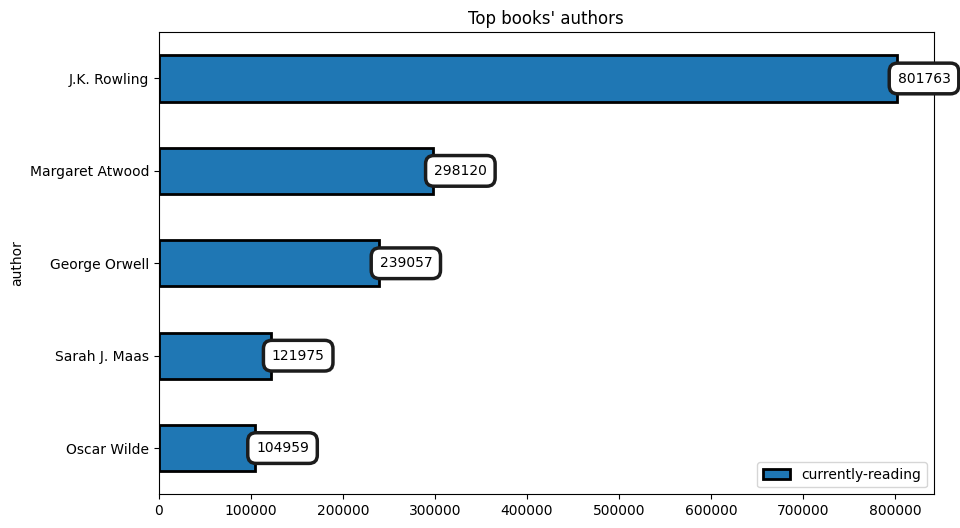

In [ ]:
topauthors=pd.pivot_table(df2,index='author',values='currently-reading',aggfunc='sum')
topauthors=topauthors.sort_values(by='currently-reading',ascending=False).head()
topauthors=topauthors.sort_values(by='currently-reading',ascending=True)
p1=topauthors.plot(kind='barh',figsize=(10,6),title="Top books' authors",edgecolor = 'black',lw=2)
p1.bar_label(p1.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

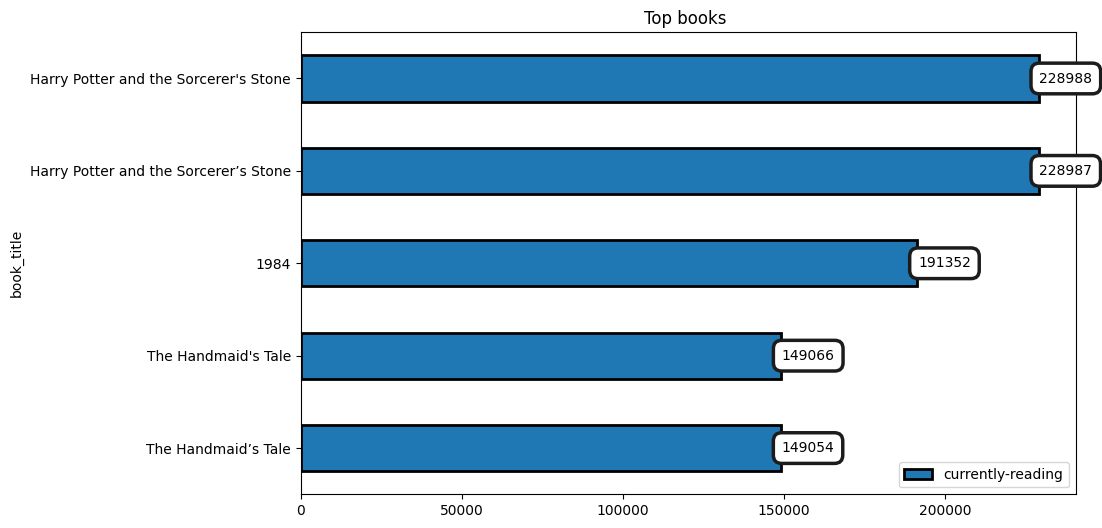

In [ ]:
topbooks=pd.pivot_table(df2,index='book_title',values='currently-reading')
topbooks=topbooks.sort_values(by='currently-reading',ascending=False).head()
topbooks=topbooks.sort_values(by='currently-reading',ascending=True)
p2=topbooks.plot(kind='barh',figsize=(10,6),title='Top books ',edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

<Axes: title={'center': 'Book rating score and the number of readers'}, xlabel='average_rating', ylabel='currently-reading'>

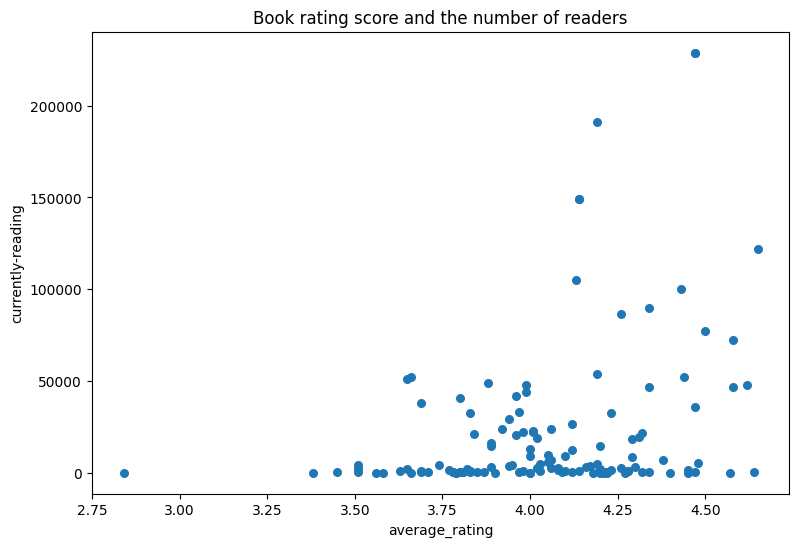

In [ ]:
df2.plot(kind='scatter', x='average_rating', y='currently-reading',figsize=(9,6),s=30,title='Book rating score and the number of readers')

<Axes: >

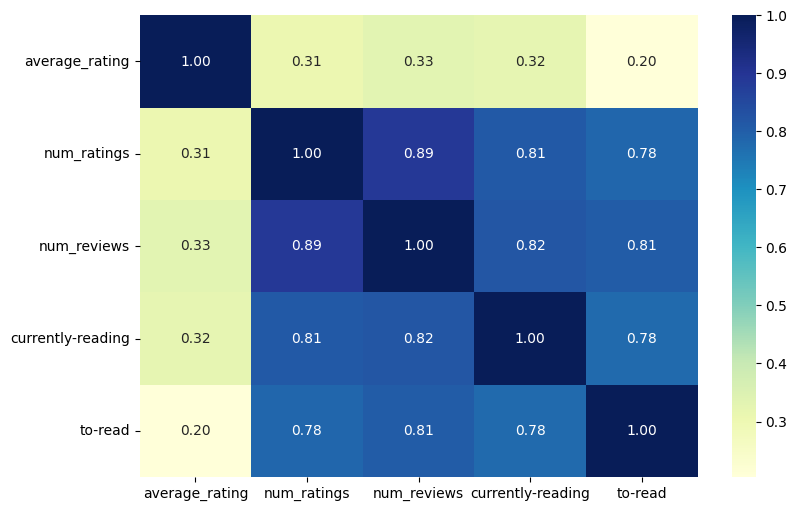

In [ ]:
dfcorr=df2[['average_rating','num_ratings','num_reviews','currently-reading', 'to-read']]
plt.figure(figsize=(9,6))
sns.heatmap(dfcorr.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

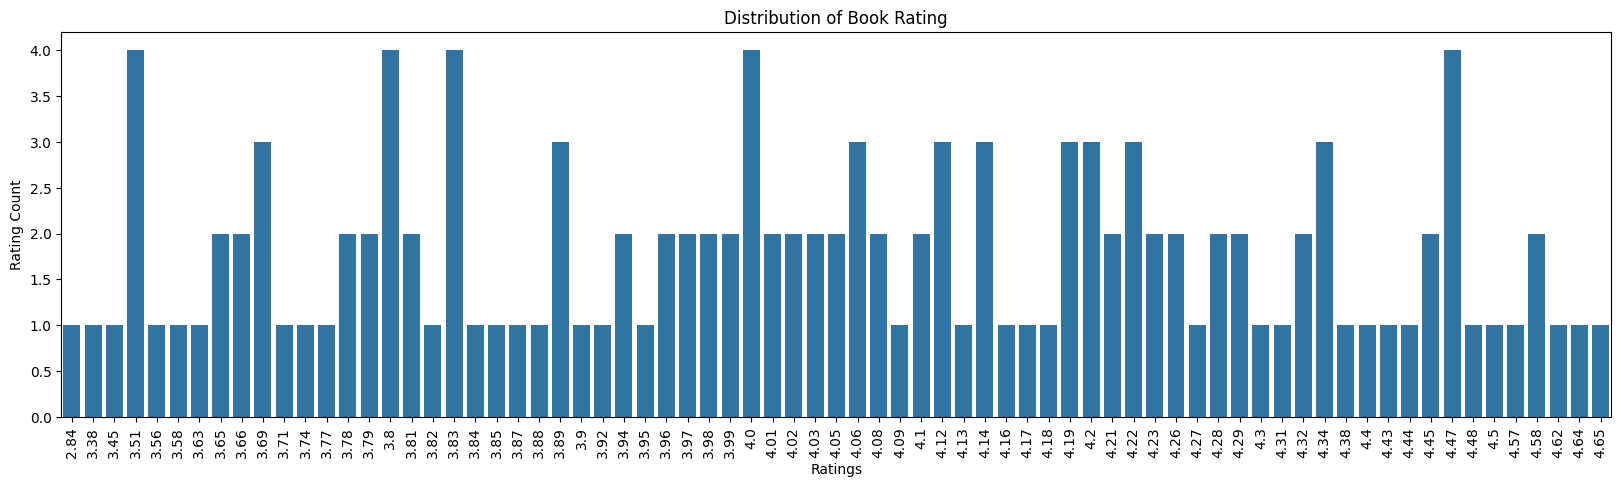

In [ ]:
books_rating_distribution = df2['average_rating'].value_counts().sort_index()
plt.figure(figsize=(20, 5))
sns.barplot(x=books_rating_distribution.index, y=books_rating_distribution.values)
plt.title("Distribution of Book Rating")
plt.xlabel('Ratings')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
authors_count = df2.groupby('author')['book_title'].count()
authors_count = authors_count.sort_values(ascending=False).head(15)

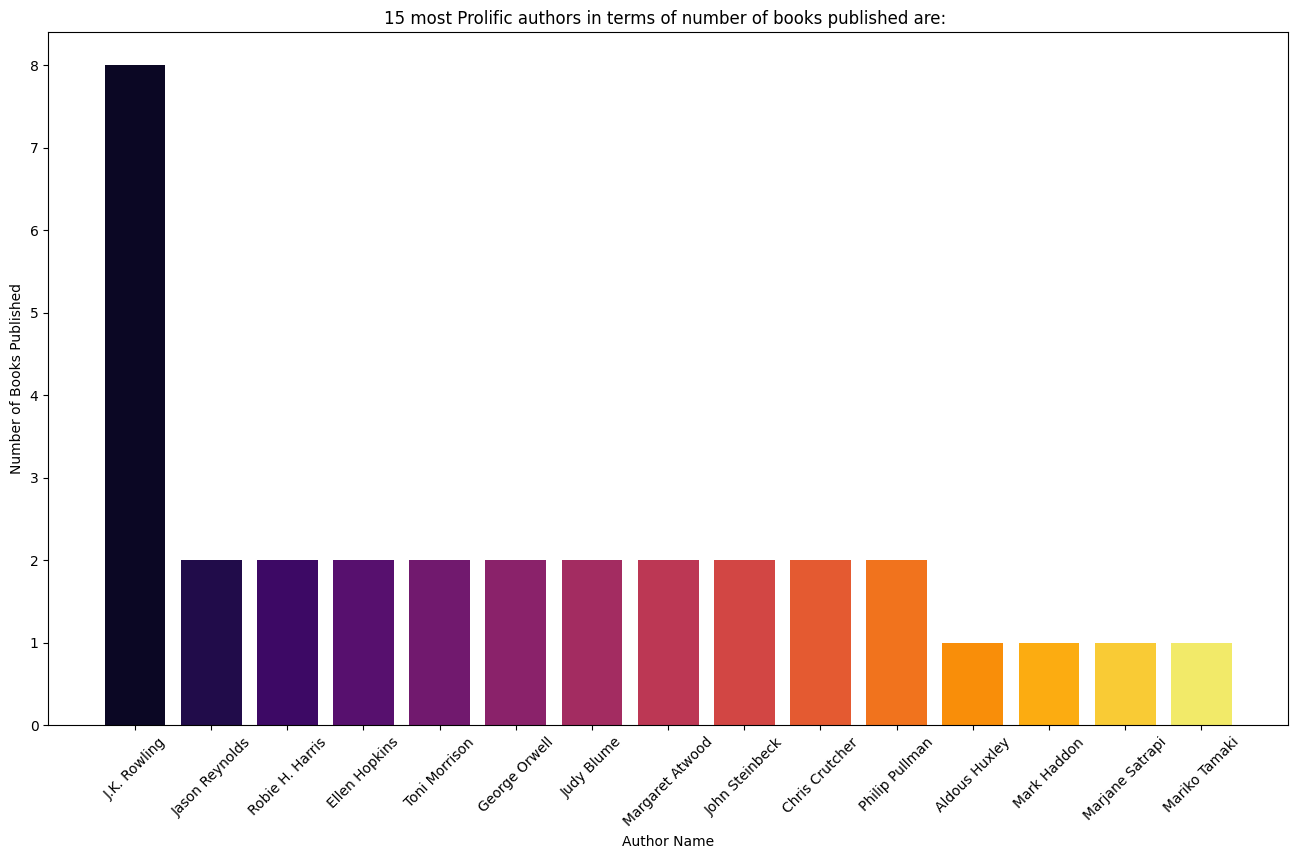

In [ ]:
plt.figure(figsize=(16,9))
colors = sns.color_palette('inferno', len(authors_count))
plt.bar(authors_count.index, authors_count.values, color=colors)
plt.title("15 most Prolific authors in terms of number of books published are: ")
plt.xlabel("Author Name")
plt.ylabel("Number of Books Published")
plt.xticks(rotation=45)
plt.show()

In [ ]:
all_book_data['genres'] = all_book_data['genres'].apply(eval)

In [ ]:
result_df = all_book_data.explode('genres')
result_df

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,Graphic Novels,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,Comics,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,Fiction,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,Graphic Novels Comics,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,Fantasy,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,99561,99561,https://images-na.ssl-images-amazon.com/images...,Looking for Alaska,NaN,NaN,https://www.goodreads.com/work/editions/919292,9781435249,9781435249158,"March 3, 2005",...,John Green,221,Contemporary,"{'to-read': 768711, 'currently-reading': 33105...","{'Best Young Adult Books': [17, 12743], 'Best ...",1630342,77013,3.97,"{'5 Stars': 40930, '4 Stars': 107858, '3 Stars...",https://www.goodreads.com/book/show/99561/revi...
141,99561,99561,https://images-na.ssl-images-amazon.com/images...,Looking for Alaska,NaN,NaN,https://www.goodreads.com/work/editions/919292,9781435249,9781435249158,"March 3, 2005",...,John Green,221,Romance,"{'to-read': 768711, 'currently-reading': 33105...","{'Best Young Adult Books': [17, 12743], 'Best ...",1630342,77013,3.97,"{'5 Stars': 40930, '4 Stars': 107858, '3 Stars...",https://www.goodreads.com/book/show/99561/revi...
141,99561,99561,https://images-na.ssl-images-amazon.com/images...,Looking for Alaska,NaN,NaN,https://www.goodreads.com/work/editions/919292,9781435249,9781435249158,"March 3, 2005",...,John Green,221,Realistic Fiction,"{'to-read': 768711, 'currently-reading': 33105...","{'Best Young Adult Books': [17, 12743], 'Best ...",1630342,77013,3.97,"{'5 Stars': 40930, '4 Stars': 107858, '3 Stars...",https://www.goodreads.com/book/show/99561/revi...
141,99561,99561,https://images-na.ssl-images-amazon.com/images...,Looking for Alaska,NaN,NaN,https://www.goodreads.com/work/editions/919292,9781435249,9781435249158,"March 

In [ ]:
# Mapping of specific genres to broader categories
genre_mapping = {
    'Science Fiction': 'Science Fiction',
    'Fiction': 'Fiction',
    'Fantasy': 'Fantasy',
    'Romance': 'Romance',
    'Mystery': 'Mystery',
    'Historical Fiction': 'Historical',
    'Literature': 'Fiction',
    'Adventure': 'Adventure',
    'Horror': 'Horror',
    'Thriller': 'Mystery',
    'Suspense': 'Mystery',
    'Nonfiction': 'Nonfiction',
    'Biography': 'Nonfiction',
    'Memoir': 'Nonfiction',
    'History': 'Nonfiction',
    'Philosophy': 'Nonfiction',
    'Action': 'Action',
    'Crime': 'Mystery',
    'Childrens': 'Childrens',
    'Young Adult': 'Young Adult',
    'Middle Grade': 'Young Adult',
    'Juvenile': 'Childrens',
    'Contemporary': 'Fiction',
    'Literary Fiction': 'Fiction',
    'Politics': 'Nonfiction',
    'Social Justice': 'Nonfiction',
    'African Literature': 'Literature',
    'Magical Realism': 'Fantasy',
    'India': 'Literature',
    'Music': 'Nonfiction',
    'Biography Memoir': 'Nonfiction',
    'Rock N Roll': 'Nonfiction',
    'Speculative Fiction': 'Fantasy',
    'Audiobook': 'Nonfiction',
    'Realistic Fiction': 'Fiction',
    'High Fantasy': 'Fantasy',
    'Epic Fantasy': 'Fantasy',
    'Short Stories': 'Fiction',
    'Mystery Thriller': 'Mystery',
    'Westerns': 'Regional and Historical',
    'Detective': 'Mystery',
    'Psychology': 'Nonfiction',
    'Self Help': 'Nonfiction',
    'Mental Health': 'Nonfiction',
    'Health': 'Nonfiction',
    'Personal Development': 'Nonfiction',
    'Magic': 'Fantasy',
    'Nobel Prize': 'Nonfiction',
    'Religion': 'Nonfiction',
    'Russia': 'Nonfiction',
    'Russian History': 'Nonfiction',
    'European History': 'Nonfiction',
    'War': 'Nonfiction',
    'Vampires': 'Fantasy',
    'Urban Fantasy': 'Fantasy',
    'Ireland': 'Nonfiction',
    'Irish Literature': 'Literature',
    'British Literature': 'Literature',
    'Sci Fi Fantasy': 'Fantasy',
    'Tudor Period': 'Historical',
    '16th Century': 'Historical',
    'Victorian': 'Historical',
    'Supernatural': 'Fantasy',
    'Ghosts': 'Horror',
    'True Crime': 'Nonfiction',
    'Autobiography': 'Nonfiction',
    'Picture Books': 'Childrens',
    'Dragons': 'Fantasy',
    'Fairy Tales': 'Fantasy',
    'Fashion': 'Nonfiction',
    'Pop Culture': 'Nonfiction',
    'Horses': 'Nonfiction',
    'Writing': 'Nonfiction',
    'Southern Gothic': 'Fiction',
    'Star Wars': 'Science Fiction',
    'Space Opera': 'Science Fiction',
    'Coming Of Age': 'Fiction',
    'Algeria': 'Nonfiction',
    'France': 'Nonfiction',
    'Feminism': 'Nonfiction',
    'LGBT': 'Nonfiction',
    'Lesbian': 'Nonfiction',
    'Queer': 'Nonfiction',
    'Gender': 'Nonfiction',
    'China': 'Nonfiction',
    'Asian Literature': 'Literature',
    'School': 'Fiction',
    'Australia': 'Nonfiction',
    'Hard Boiled': 'Mystery',
    '20th Century': 'Historical',
    'Animals': 'Nonfiction',
    'Gothic': 'Horror',
    'Drama': 'Fiction',
    'Canada': 'Nonfiction',
    'Jewish': 'Nonfiction',
    'Canadian Literature': 'Literature',
    'Indian Literature': 'Literature',
    'Asia': 'Nonfiction',
    'Teen': 'Young Adult',
    'Dystopia': 'Science Fiction',
    'Post Apocalyptic': 'Science Fiction',
    'Robots': 'Science Fiction',
    'Military Fiction': 'Nonfiction',
    'World War II': 'Historical',
    'Travel': 'Nonfiction',
    'Nature': 'Nonfiction',
    'Japan': 'Nonfiction',
    'Essays': 'Nonfiction',
    'Japanese Literature': 'Literature',
    'Art': 'Fine Arts',
    'Art History': 'Fine Arts',
    'Design': 'Nonfiction',
    'Reference': 'Nonfiction',
    'Fables': 'Fiction',
    'Photography': 'Nonfiction',
    'Theory': 'Nonfiction',
    'Poetry': 'Nonfiction',
    'Time Travel': 'Science Fiction',
    'African American': 'Nonfiction',
    'Race': 'Nonfiction',
    'International': 'Nonfiction',
    'Cozy Mystery': 'Mystery',
    'Chick Lit': 'Fiction',
    'Contemporary Romance': 'Romance',
    'Chapter Books': 'Childrens',
    '2nd Grade': 'Childrens',
    'Anthologies': 'Fiction',
    'Christianity': 'Nonfiction',
    'Sexuality': 'Nonfiction',
    'Aliens': 'Science Fiction',
    'Boarding School': 'Fiction',
    'Graphic Novels': 'Comics',
    'Adult': 'Fiction',
    'Spanish Literature': 'Literature',
    'Books About Books': 'Nonfiction',
    'Swedish Literature': 'Literature',
    'Latin American': 'Nonfiction',
    'Egypt': 'Nonfiction',
    'Relationships': 'Nonfiction',
    'Marriage': 'Nonfiction',
    'Christian': 'Nonfiction',
    'Anthropology': 'Nonfiction',
    'Biology': 'Nonfiction',
    'Evolution': 'Nonfiction',
    'Unfinished': 'Nonfiction',
    'Adult Fiction': 'Fiction',
    'Natural History': 'Nonfiction',
    'Presidents': 'Nonfiction',
    'Christmas': 'Nonfiction',
    'Hugo Awards': 'Science Fiction',
    'Geography': 'Nonfiction',
    'Americana': 'Nonfiction',
    'Geology': 'Nonfiction',
    'Nigeria': 'Nonfiction',
    'Noir': 'Mystery',
    'Banned Books': 'Nonfiction',
    'Holocaust': 'Nonfiction',
    'Germany': 'Nonfiction',
    'German Literature': 'Literature',
    'Horse Racing': 'Nonfiction',
    'Business': 'Nonfiction',
    'Leadership': 'Nonfiction',
    'Management': 'Nonfiction',
    'Productivity': 'Nonfiction',
    'Holiday': 'Nonfiction',
    'Italy': 'Nonfiction',
    'Survival': 'Nonfiction',
    'Polish Literature': 'Literature',
    'Poland': 'Nonfiction',
    'Plays': 'Drama',
    'Theatre': 'Drama',
    'Womens': 'Nonfiction',
    'Retellings': 'Fiction',
    'Communication': 'Nonfiction',
    'Maps': 'Nonfiction',
    'Collections': 'Fiction',
    'Russian Literature': 'Literature',
    'Sword and Sorcery': 'Fantasy',
    'Folklore': 'Fantasy',
    'Medical': 'Nonfiction',
    'Architecture': 'Nonfiction',
    'Journalism': 'Nonfiction',
    'Criticism': 'Nonfiction',
    'Arthurian': 'Fantasy',
    'Mythology': 'Fantasy',
    'Young Adult Fantasy': 'Young Adult',
    'Kids': 'Childrens',
    'Storytime': 'Childrens',
    'Civil War': 'Historical',
    'Comics': 'Comics',
    'Comic Strips': 'Comics',
    'Cartoon': 'Comics',
    '15th Century': 'Historical',
    'Plantagenet': 'Historical',
    'Spirituality': 'Nonfiction',
    'Taoism': 'Nonfiction',
    'Conspiracy Theories': 'Nonfiction',
    'Witches': 'Fantasy',
    'Graphic Novels Comics': 'Comics',
    'Novella': 'Fiction',
    'Family': 'Fiction',
    'Cultural': 'Nonfiction',
    'Money': 'Nonfiction',
    'Murder Mystery': 'Mystery',
    'Latin American Literature': 'Literature',
    'Spain': 'Nonfiction',
    'Dying Earth': 'Fantasy',
    'Romania': 'Nonfiction',
    'Scandinavian Literature': 'Literature',
    'Finnish Literature': 'Literature',
    'Star Trek': 'Science Fiction',
    'Media Tie In': 'Fiction',
    'Star Trek Original Series': 'Science Fiction',
    'Cookbooks': 'Nonfiction',
    'Food and Drink': 'Nonfiction',
    'Romantic Suspense': 'Romance',
    'Denmark': 'Nonfiction',
    'Iran': 'Nonfiction',
    'Food': 'Nonfiction',
    'Historical Romance': 'Romance',
    'Native Americans': 'Nonfiction',
    'Beauty and The Beast': 'Fantasy',
    'Regency': 'Romance',
    'Lebanon': 'Nonfiction',
    'Brazil': 'Nonfiction',
    'Portuguese Literature': 'Literature',
    'Sociology': 'Nonfiction',
    'Parenting': 'Nonfiction',
    'Education': 'Nonfiction',
    'Teaching': 'Nonfiction',
    'Scotland': 'Nonfiction',
    '11th Century': 'Historical',
    'Sports': 'Nonfiction',
    'Baseball': 'Nonfiction',
    'New York': 'Nonfiction',
    'Werewolves': 'Fantasy',
    'Pakistan': 'Nonfiction',
    'Steampunk': 'Science Fiction',
    'Alternate History': 'Science Fiction',
    'Historical Fantasy': 'Fantasy',
    'Spy Thriller': 'Mystery',
    'Chess': 'Nonfiction',
    'Greek Mythology': 'Fantasy',
    'Cats': 'Nonfiction',
    'High School': 'Young Adult',
    'Read For School': 'Nonfiction',
    'Psychoanalysis': 'Nonfiction',
    'Sweden': 'Nonfiction',
    'Modern Classics': 'Fiction',
    'Turkish Literature': 'Literature',
    'Turkish': 'Nonfiction',
    'Weird Fiction': 'Fantasy',
    'Western Romance': 'Romance',
    'Witchcraft': 'Fantasy',
    'Cooking': 'Nonfiction',
    'Category Romance': 'Romance',
    'fiction': 'Fiction',
    'Crafts': 'Nonfiction',
    'Literary Criticism': 'Nonfiction',
    'Czech Literature': 'Literature',
    'Cyberpunk': 'Science Fiction',
    'French Literature': 'Literature',
    'Dark': 'Fantasy',
    'Heroic Fantasy': 'Fantasy',
    'Dragonlance': 'Fantasy',
    'Manga': 'Comics',
    'Gothic Romance': 'Romance',
    'Language': 'Nonfiction',
    'Linguistics': 'Nonfiction',
    'Dinosaurs': 'Nonfiction',
    'Israel': 'Nonfiction',
    'Christian Fiction': 'Fiction',
    'Popular Science': 'Nonfiction',
    'Quantum Mechanics': 'Nonfiction',
    'Dark Fantasy': 'Fantasy',
    'Portugal': 'Nonfiction',
    'The United States Of America': 'Nonfiction',
    'American Fiction': 'Fiction',
    'Seinen': 'Comics',
    'Halloween': 'Nonfiction',
    'Gardening': 'Nonfiction',
    'Medicine': 'Nonfiction',
    'Neuroscience': 'Nonfiction',
    'Womens Fiction': 'Fiction',
    'Apocalyptic': 'Science Fiction',
    'Roman': 'Fiction',
    'Animal Fiction': 'Fiction',
    'Judaism': 'Nonfiction',
    'Regency Romance': 'Romance',
    'Ancient History': 'Historical',
    'Ancient': 'Historical',
    'Culinary': 'Nonfiction',
    'New Weird': 'Fantasy',
    'Paranormal Romance': 'Romance',
    'Science Fiction Romance': 'Science Fiction',
    'Love': 'Romance',
    'Legal Thriller': 'Mystery',
    'Batman': 'Comics',
    'Comic Book': 'Comics',
    'Dc Comics': 'Comics',
    'Atheism': 'Nonfiction',
    'World History': 'Nonfiction',
    '19th Century': 'Historical',
    'Dogs': 'Nonfiction',
    'Film': 'Nonfiction',
    'Cult Classics': 'Fiction',
    'Shojo': 'Comics',
    'Inspirational': 'Nonfiction',
    'Transport': 'Nonfiction',
    'Stories': 'Fiction',
    'American Civil War': 'Historical',
    'Military History': 'Nonfiction',
    'Ghost Stories': 'Horror',
    'Pirates': 'Adventure',
    'Economics': 'Nonfiction',
    'Government': 'Nonfiction',
    'Environment': 'Nonfiction',
    'Class': 'Nonfiction',
    'Epic': 'Fantasy',
    'Fae': 'Fantasy',
    '1st Grade': 'Childrens',
    'Hungary': 'Nonfiction',
    'Hungarian Literature': 'Literature',
    'Military Science Fiction': 'Science Fiction',
    'Book Club': 'Fiction',
    'Gender Studies': 'Nonfiction',
    'Lds Fiction': 'Fiction',
    'Lds': 'Nonfiction',
    'Musicals': 'Nonfiction',
    'Female Authors': 'Nonfiction',
    'Academic': 'Nonfiction',
    'College': 'Nonfiction',
    'Chinese Literature': 'Literature',
    'Post Colonial': 'Nonfiction',
    'Faith': 'Nonfiction',
    'Theology': 'Nonfiction',
    'Football': 'Nonfiction',
    'Mountaineering': 'Nonfiction',
    'Zimbabwe': 'Nonfiction',
    'Forgotten Realms': 'Fantasy',
    'Dungeons and Dragons': 'Fantasy',
    '18th Century': 'Historical',
    'Harem': 'Romance',
    'Disability': 'Nonfiction',
    'Finance': 'Nonfiction',
    'Counting': 'Childrens',
    'Mathematics': 'Nonfiction',
    'French Revolution': 'Historical',
    'Psychological Thriller': 'Mystery',
    'Art': 'Fine Arts',
    'galiza': 'Nonfiction',
    'hespaña': 'Nonfiction',
    'Mental Illness': 'Nonfiction',
    'Archaeology': 'Nonfiction',
    'Buddhism': 'Nonfiction',
    'Futuristic': 'Science Fiction',
    'Harlequin': 'Romance',
    'Political Science': 'Nonfiction',
    'Buisness': 'Nonfiction',
    'Art Design': 'Fine Arts',
    'Church': 'Nonfiction',
    'Death': 'Nonfiction',
    'World War I': 'Historical',
    'Medieval Romance': 'Romance',
    'M F Romance': 'Romance',
    'Travelogue': 'Nonfiction',
    'Abuse': 'Nonfiction',
    'Medieval History': 'Historical',
    'Ecology': 'Nonfiction',
    'Sustainability': 'Nonfiction',
    'Climate Change': 'Nonfiction',
    'Romanovs': 'Nonfiction',
    'Modern': 'Nonfiction',
    'Danish': 'Nonfiction',
    'Herbs': 'Nonfiction',
    'Nordic Noir': 'Mystery',
    'Christian Living': 'Nonfiction',
    'Greece': 'Nonfiction',
    'Comic Fantasy': 'Fantasy',
    'Skepticism': 'Nonfiction',
    'Angels': 'Fantasy',
    'Law': 'Nonfiction',
    'Sports Romance': 'Romance',
    'Technology': 'Nonfiction',
    'Academia': 'Nonfiction',
    '12th Century': 'Historical',
    'M M Romance': 'Romance',
    '17th Century': 'Historical',
    'Back To School': 'Fiction',
    'Gay': 'LGBT',
    'American Revolution': 'Historical',
    'Ukraine': 'Nonfiction',
    'Semiotics': 'Nonfiction',
    'Botswana': 'Nonfiction',
    'Rwanda': 'Nonfiction',
    'Police': 'Mystery',
    'How To': 'Nonfiction',
    'Cities': 'Nonfiction',
    'Society': 'Nonfiction',
    'Computer Science': 'Nonfiction',
    'Microhistory': 'Nonfiction',
    'Food History': 'Nonfiction',
    'Disease': 'Nonfiction',
    'Home Economics': 'Nonfiction',
    'Fairy Tale Retellings': 'Fantasy',
    'Amish': 'Nonfiction',
    'Poverty': 'Nonfiction',
    'Erotica': 'Romance',
    'Foodie': 'Nonfiction',
    'Autistic Spectrum Disorder': 'Nonfiction',
    'Railways': 'Nonfiction',
    'Adoption': 'Nonfiction',
    'Mermaids': 'Fantasy',
    'Singularity': 'Science Fiction',
    'Cults': 'Nonfiction',
    'Growth Mindset': 'Nonfiction',
    'Bangladesh': 'Nonfiction',
    'Fairies': 'Fantasy',
    'Food Writing': 'Nonfiction',
    'Shapeshifters': 'Fantasy',
    '21st Century': 'Fiction',
    'Zombies': 'Horror',
    'Nutrition': 'Nonfiction',
    'Fantasy Romance': 'Romance',
    'Terrorism': 'Nonfiction',
    'Sudan': 'Nonfiction',
    'Amazon': 'Nonfiction',
    'Demons': 'Fantasy',
    'New Adult': 'Romance',
    'Ethiopia': 'Nonfiction',
    'Road Trip': 'Fiction',
    'Young Adult Contemporary': 'Young Adult',
    'Polygamy': 'Romance',
    'BDSM': 'Romance',
    'Erotic Romance': 'Romance',
    'Love Story': 'Romance',
    'Fighters': 'Romance',
    'Motorcycle': 'Romance',
    'Musicians': 'Nonfiction',
    'Menage': 'Romance',
    'New Adult Romance': 'Romance',
    'M M F': 'Romance',
    'European Literature': 'Literature',
    'Google': 'Nonfiction',
    'Gay For You': 'LGBT',
    'Soldiers': 'Nonfiction',
    'Hockey': 'Nonfiction',
    'Military Romance': 'Romance',
    'Racing': 'Nonfiction',
    'M M Contemporary': 'Romance',
    'Superheroes': 'Comics',
    'Young Adult Romance': 'Young Adult',
    'Bulgaria': 'Nonfiction',
    'Young Adult Science Fiction': 'Young Adult',
    'Reverse Harem': 'Romance',
    'Anti Racist': 'Nonfiction',
    'Christian Non Fiction': 'Nonfiction',
    'Transgender': 'LGBT',
    'Basketball': 'Nonfiction',
    'Historical' :'Historical',
    'Science Fiction Fantasy':'Science Fiction',
    'Paranormal':'Science Fiction',
    'Comedy':'Comedy',
    'Humor':'Comedy',
    'Classics':'Classics',
    'Science':'Science',
    'Space':'Science',
    'Physics':'Science',
    'Espionage':'Mystery',
    'Novels':'Comics',
    'Astronomy':'Science',
    'Prehistoric':'Historical',
    'Italian Literature':'Literature',
    'Historical Mystery':'Historical',
    'American':'Regional and Historical',
    'Medieval':'Historical',
    'Southern':'Regional and Historical',
    'Africa':'Regional and Historical',
    'American History':'Regional and Historical',
    'South Africa':'Regional and Historical',
    'art':'Fine Arts'
}

# Apply the mapping to create a new 'Category' column
result_df['Category'] = result_df['genres'].map(genre_mapping)

In [ ]:
result_df['Category'] = result_df['Category'].str.lower()
result_df['Category'].value_counts()

,count
Category,
fiction,265
nonfiction,256
young adult,122
childrens,64
comics,51
fantasy,49
classics,47
historical,32
science fiction,31


In [ ]:
result_df.isnull().sum()

,0
book_id_title,0
book_id,0
cover_image_uri,0
book_title,0
book_series,630
book_series_uri,588
top_5_other_editions,0
isbn,0
isbn13,0
year_first_published,0


In [ ]:
result_df = result_df.dropna(subset=['Category'])

<ipython-input-138-c684b7fa8267>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=genre_category_count.index, y=genre_category_count.values,palette='crest_r',


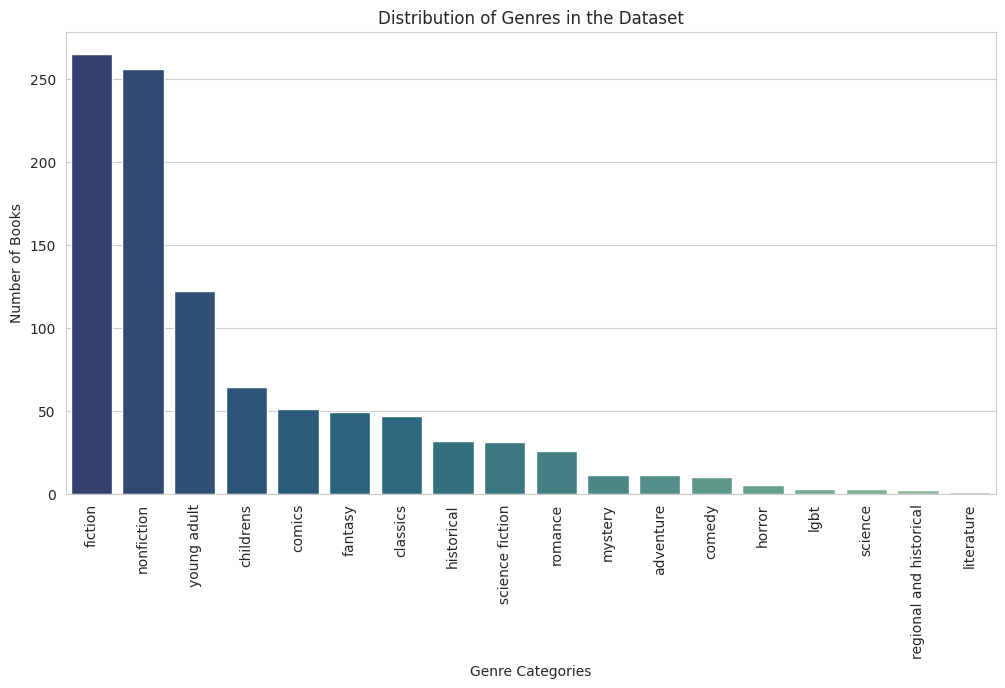

In [ ]:
sns.set_style('whitegrid')
genre_category_count = result_df['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plot = sns.barplot(x=genre_category_count.index, y=genre_category_count.values,palette='crest_r',
                   order=genre_category_count.index, )
plot.set_title('Distribution of Genres in the Dataset')
plot.set_xlabel('Genre Categories')
plot.set_ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

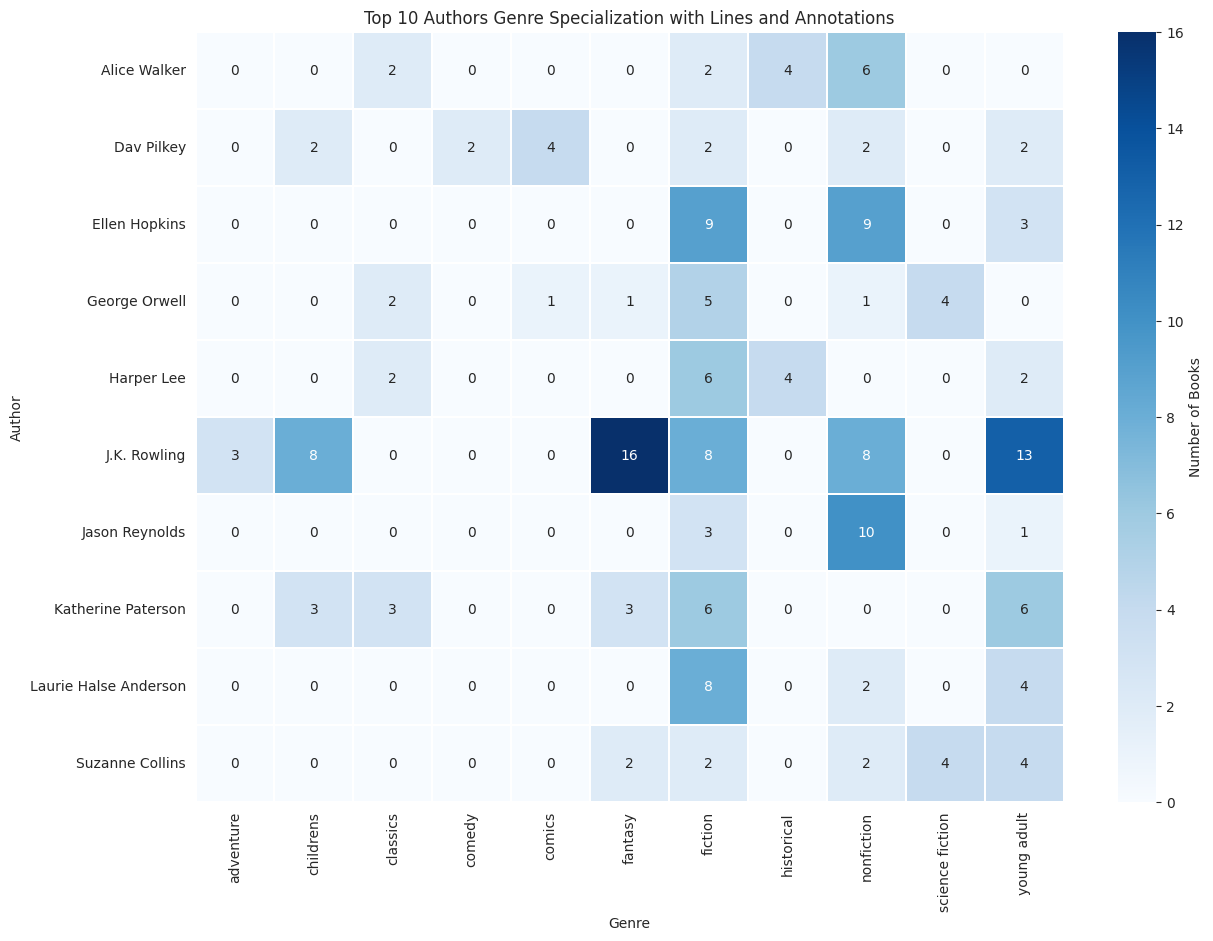

In [ ]:
# Genre by Author
top_authors = result_df['author'].value_counts().head(10).index
top_authors_df = result_df[result_df['author'].isin(top_authors)]
authors_genres_pivot = top_authors_df.pivot_table(index='author', columns='Category', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(authors_genres_pivot, cmap='Blues', linecolor='white', linewidths=0.1, annot=True, fmt='d', cbar_kws={'label': 'Number of Books'})
plt.title('Top 10 Authors Genre Specialization with Lines and Annotations')
plt.xlabel('Genre')
plt.ylabel('Author')
plt.show()

In [ ]:
all_book_data.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page,Publication Date
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,2011-09-01,...,672,"[Graphic Novels, Comics, Fiction, Graphic Nove...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,2011-09-01
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,2011-05-25,...,356,"[Romance, Fiction, Erotica, BDSM, Adult, Conte...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...,2011-05-25
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,NaN,NaN,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,2004-04-06,...,423,"[Fiction, Chick Lit, Young Adult, Drama, Adult...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...,2004-04-06
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,2011-07-11
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,2011-07-11


In [ ]:
all_book_data['year_first_published'] = pd.to_numeric(all_book_data['year_first_published'], errors='coerce').astype(int)
all_book_data.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page,Publication Date
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,1314835200000000000,...,672,"[Graphic Novels, Comics, Fiction, Graphic Nove...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,2011-09-01
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,1306281600000000000,...,356,"[Romance, Fiction, Erotica, BDSM, Adult, Conte...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...,2011-05-25
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,NaN,NaN,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,1081209600000000000,...,423,"[Fiction, Chick Lit, Young Adult, Drama, Adult...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...,2004-04-06
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,1310342400000000000,...,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,2011-07-11
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,1310342400000000000,...,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,2011-07-11


In [ ]:
all_book_data['year_first_published'] = pd.to_datetime(all_book_data['year_first_published'], format='%B %d, %Y', errors='coerce')

In [ ]:
# Extract day, month, and year into separate columns
result_df['Day'] = all_book_data['year_first_published'].dt.day
result_df['Month'] = all_book_data['year_first_published'].dt.month
result_df['Year'] = all_book_data['year_first_published'].dt.year

<ipython-input-172-587d33e7f0c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Day'] = all_book_data['year_first_published'].dt.day
<ipython-input-172-587d33e7f0c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Month'] = all_book_data['year_first_published'].dt.month
<ipython-input-172-587d33e7f0c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
all_book_data.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page,Day,Month,Year
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,2011-09-01,...,"{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,1.0,9.0,2011.0
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,2011-05-25,...,"{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...,25.0,5.0,2011.0
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,NaN,NaN,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,2004-04-06,...,"{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...,6.0,4.0,2004.0
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,"{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,11.0,7.0,2011.0
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,2011-07-11,...,"{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...,11.0,7.0,2011.0


In [ ]:
result_df.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page,Category,Day,Month,Year
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,"{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,comics,1.0,9.0,2011.0
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,"{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,comics,1.0,9.0,2011.0
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,"{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,fiction,1.0,9.0,2011.0
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,"{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,comics,1.0,9.0,2011.0
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,NaN,NaN,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,"{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...,fantasy,1.0,9.0,2011.0


<ipython-input-174-de217f414a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Decade'] = (result_df['Year'] // 10) * 10


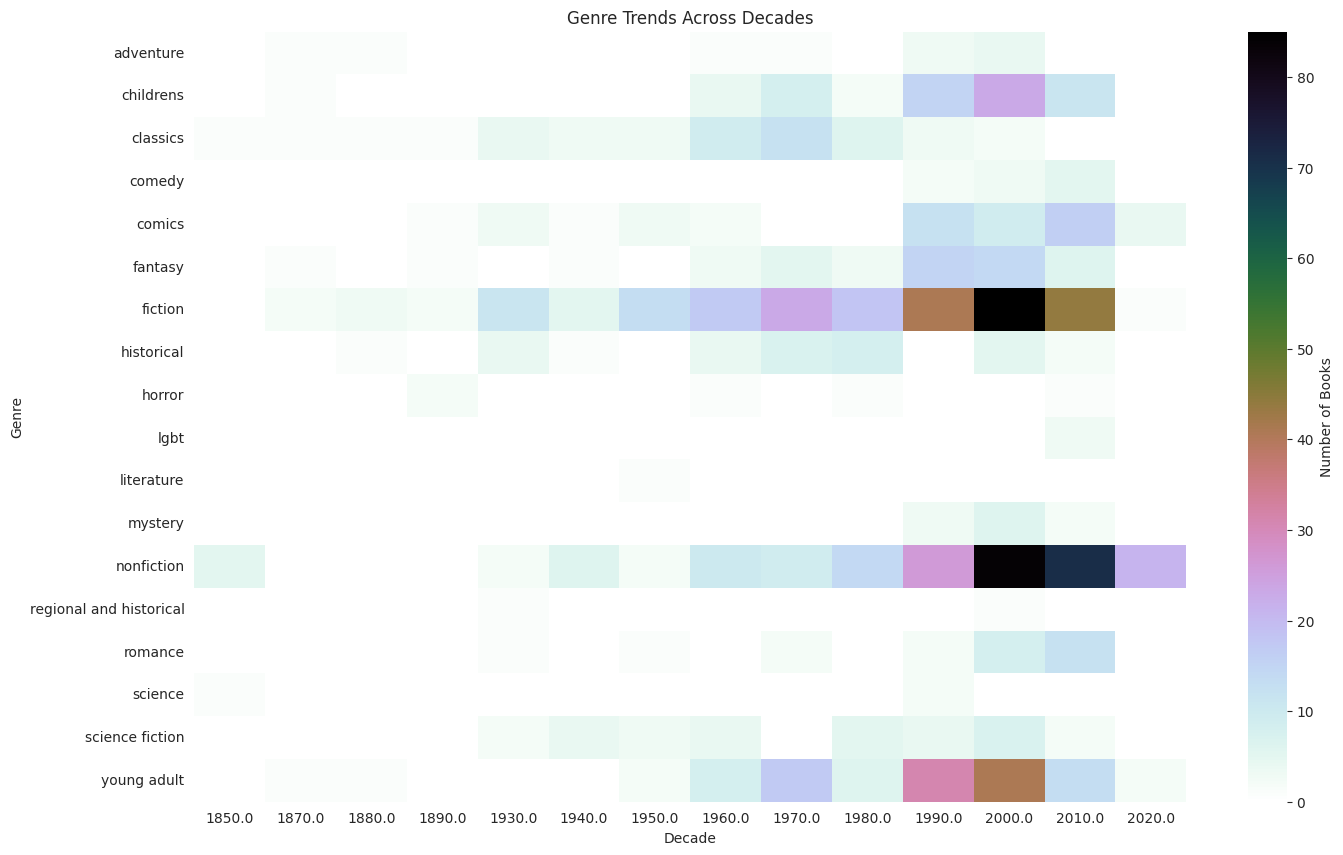

In [ ]:
result_df['Decade'] = (result_df['Year'] // 10) * 10
genres_decades_pivot = result_df.pivot_table(index='Category', columns='Decade', aggfunc='size', fill_value=0)
plt.figure(figsize=(16, 10))
sns.heatmap(genres_decades_pivot, cmap='cubehelix_r', cbar_kws={'label': 'Number of Books'})
plt.title('Genre Trends Across Decades')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.show()

<ipython-input-178-6b9693cbf7c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['average_rating'] = result_df['average_rating'].astype(float)


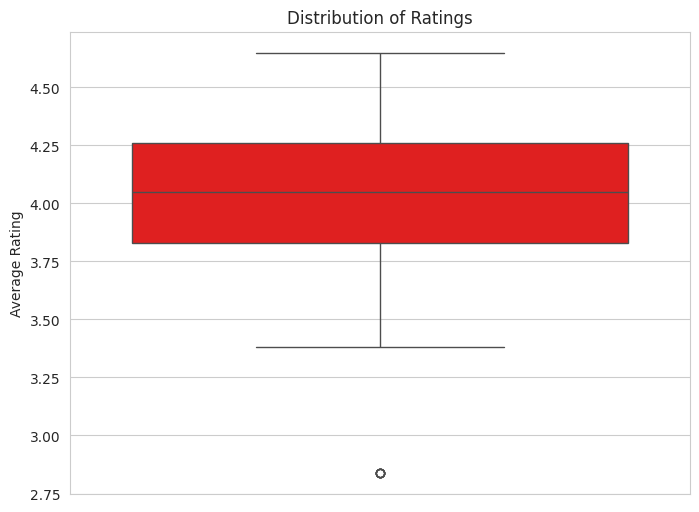

In [ ]:
result_df['average_rating'] = result_df['average_rating'].astype(float)

# Box plot of book ratings
plt.figure(figsize=(8, 6))
sns.boxplot(data=result_df, y='average_rating', color='red')
plt.title('Distribution of Ratings')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
df3 = all_book_data['genres'].apply(pd.Series)
df3

,0,1,2,3,4,5,6
0,Graphic Novels,Comics,Fiction,Graphic Novels Comics,Fantasy,Religion,Romance
1,Romance,Fiction,Erotica,BDSM,Adult,Contemporary,Contemporary Romance
2,Fiction,Chick Lit,Young Adult,Drama,Adult,Adult Fiction,Realistic Fiction
3,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
4,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
...,...,...,...,...,...,...,...
137,Picture Books,Childrens,Fiction,Fantasy,Banned Books,Classics,Food
138,Graphic Novels,Nonfiction,Memoir,Comics,Biography,History,School
139,Picture Books,Childrens,Animals,Fiction,Cats,Humor,Fantasy
140,Fiction,Mystery,Thriller,Mystery Thriller,Historical Fiction,Suspense,Adventure


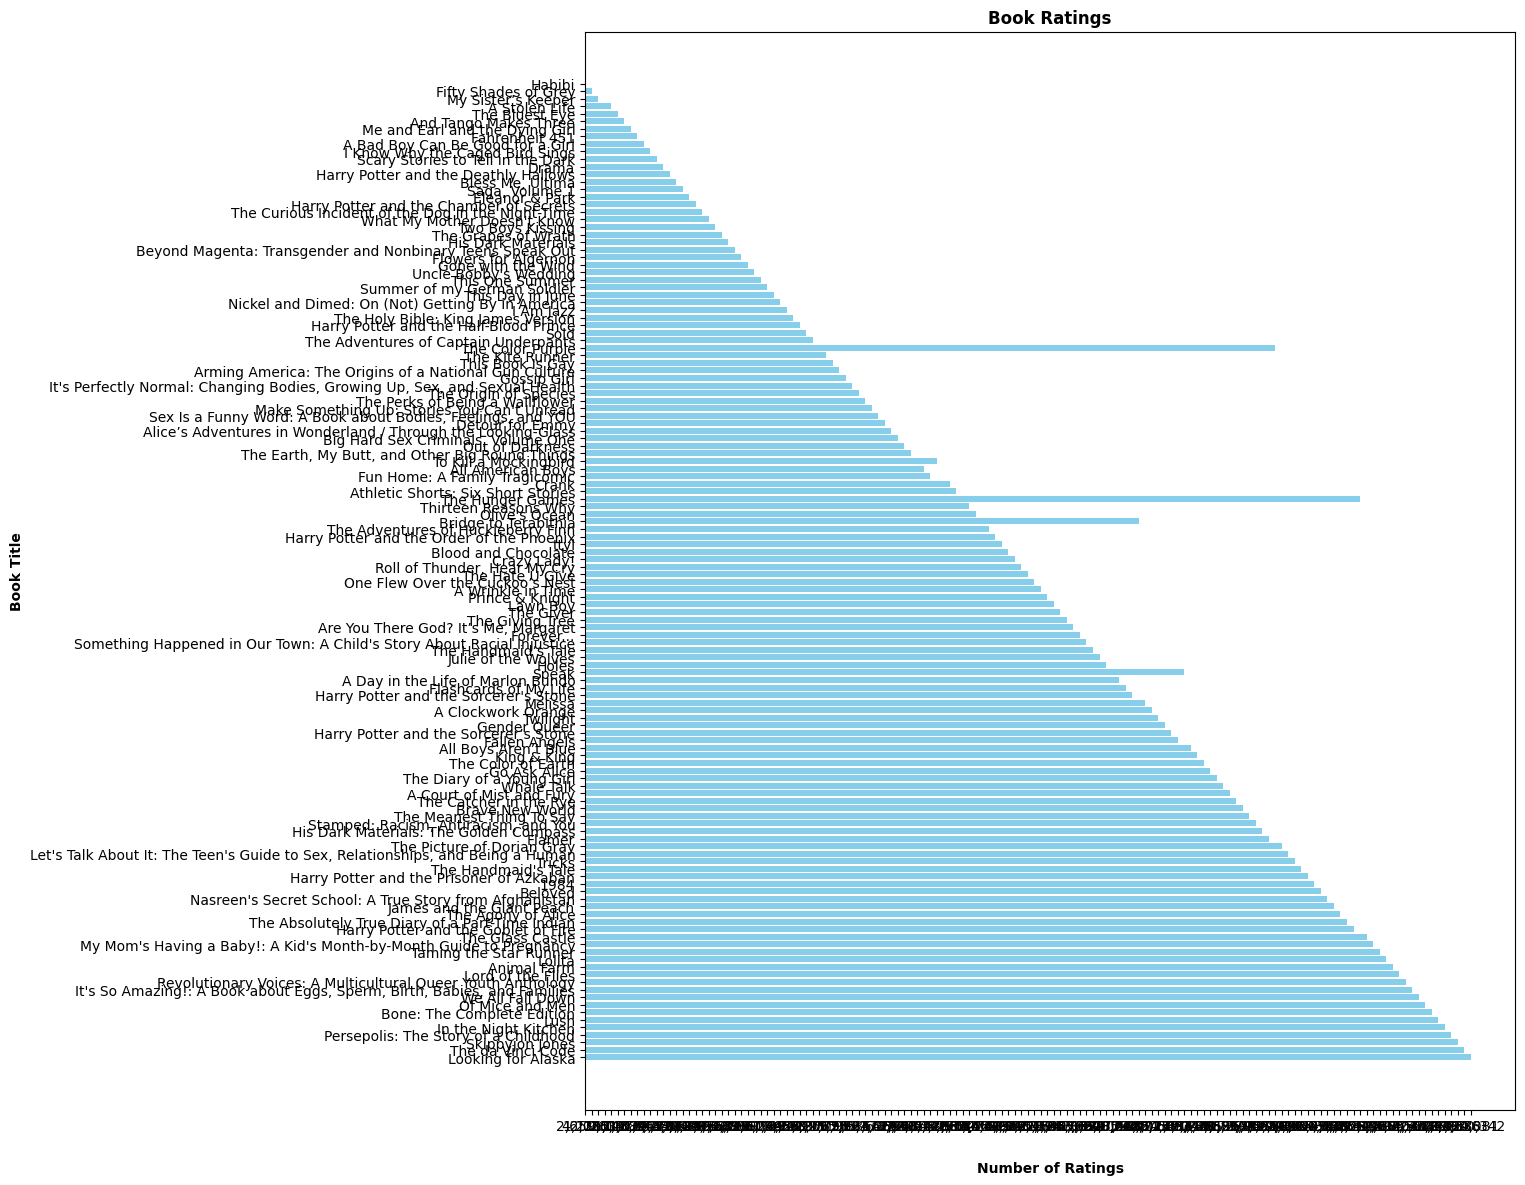

In [ ]:

# Count the total number of ratings for each book
num_ratings = all_book_data.sort_values(by='num_ratings', ascending=False)

# Create a figure of size 12 by 14
plt.figure(figsize=(12, 14))

# Write descripting labels for the axes and title
plt.xlabel('Number of Ratings', labelpad=20, weight="bold")
plt.ylabel('Book Title', weight="bold")
plt.title('Book Ratings', weight="bold")

# Define bars which will represent review totals for each book
bars = plt.barh(all_book_data['book_title'], all_book_data['num_ratings'],
                color='skyblue')

# Display the exact numeric value next to each bar
# for bar in bars:
    # plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            # '{:,}'.format(int(bar.get_width())), va='center', ha='left')

# Define a function which will aid in formatting the x-axis info
def format_x_axis_labels(x, loc):
    return "{:,}".format(int(x))

# Format the costs values along the x-axis
# plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_x_axis_labels))

# Invert the y axis so the highest sum school is at the top
plt.gca().invert_yaxis()

# Display the bar chart!
plt.show()




<Axes: title={'center': 'Rating distribution'}, xlabel='average_rating', ylabel='Count'>

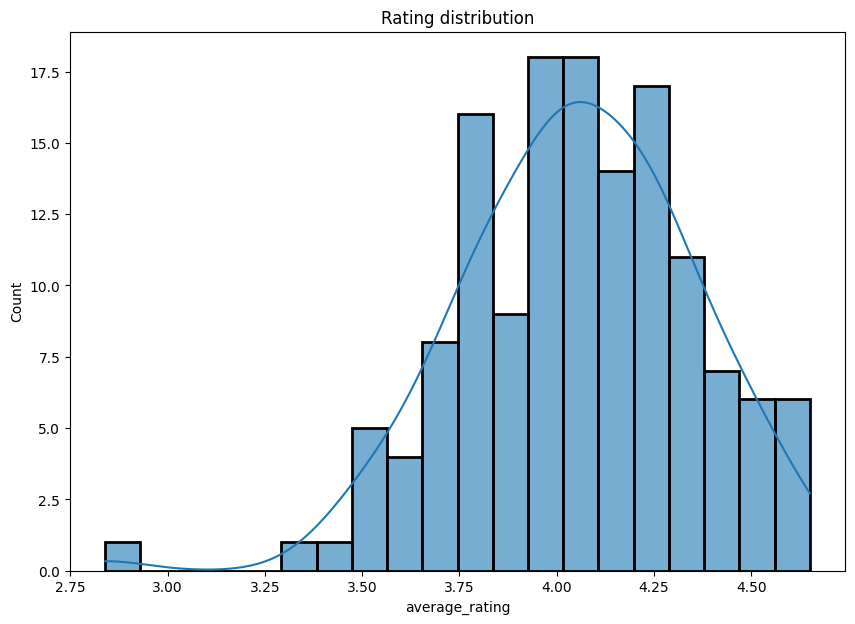

In [ ]:
# Rating Distribution based on average_rating column of all_books table
plt.figure(figsize=(10,7))
plt.title('Rating distribution')
sns.histplot(all_book_data,x='average_rating',kde=True,alpha=0.6,bins=20,linewidth=2)

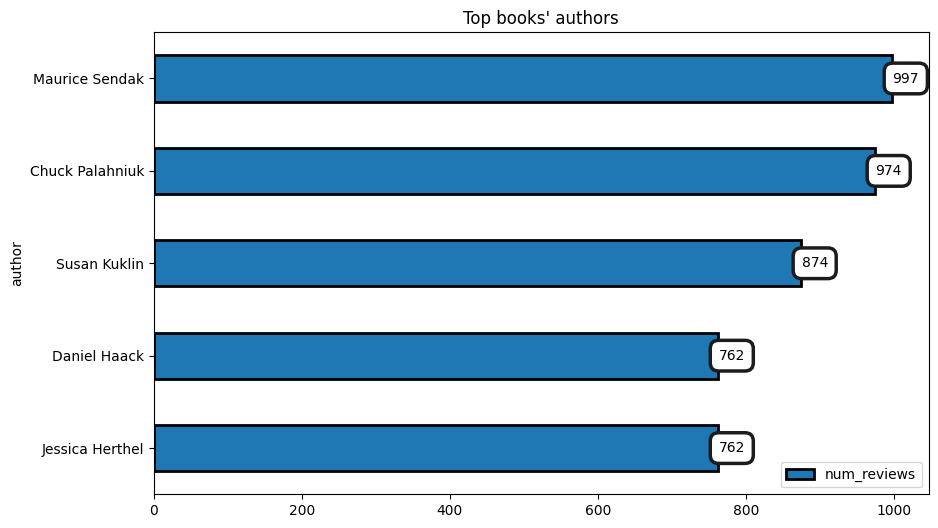

In [ ]:
# Identifying the most popular books and authors based on their review count in order to understand user preferences.
topauthors=pd.pivot_table(all_book_data,index='author',values='num_reviews',aggfunc='sum')
topauthors=topauthors.sort_values(by='num_reviews',ascending=False).head()
topauthors=topauthors.sort_values(by='num_reviews',ascending=True)
p1=topauthors.plot(kind='barh',figsize=(10,6),title="Top books' authors",edgecolor = 'black',lw=2)
p1.bar_label(p1.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

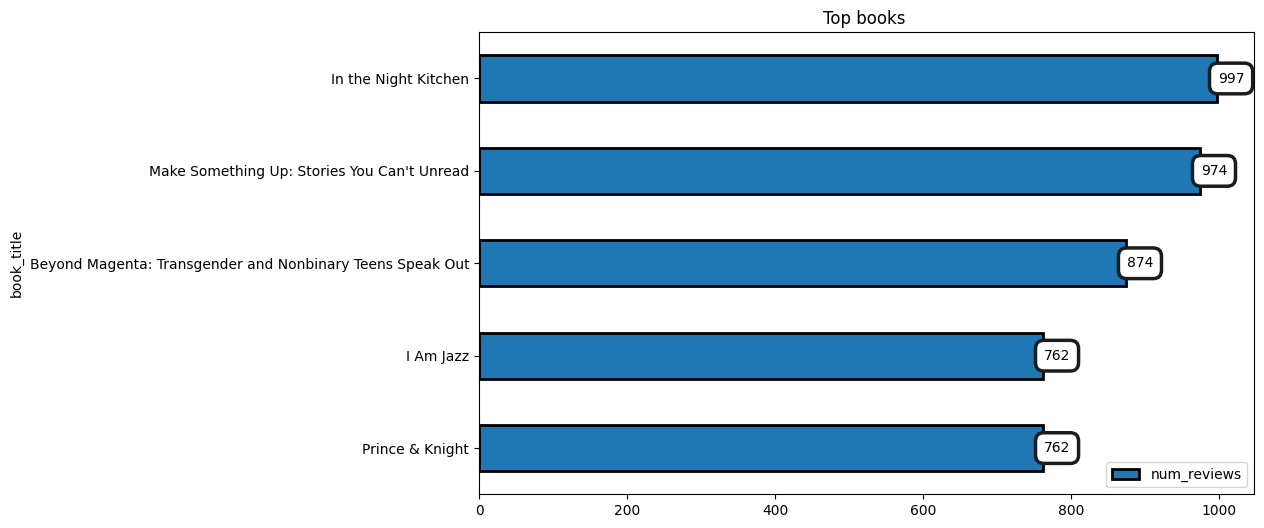

In [ ]:
# Top books based on number of reviews
topbooks=pd.pivot_table(all_book_data,index='book_title',values='num_reviews')
topbooks=topbooks.sort_values(by='num_reviews',ascending=False).head()
topbooks=topbooks.sort_values(by='num_reviews',ascending=True)
p2=topbooks.plot(kind='barh',figsize=(10,6),title='Top books ',edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

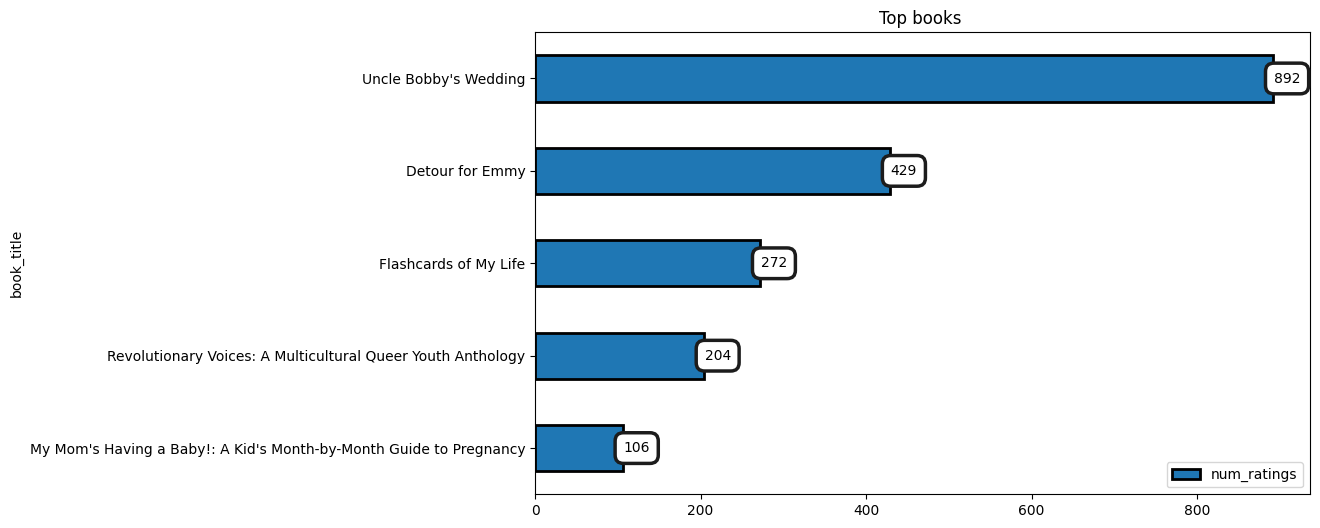

In [ ]:
# Top books based on number of ratings
topbooks=pd.pivot_table(all_book_data,index='book_title',values='num_ratings')
topbooks=topbooks.sort_values(by='num_ratings',ascending=False).head()
topbooks=topbooks.sort_values(by='num_ratings',ascending=True)
p2=topbooks.plot(kind='barh',figsize=(10,6),title='Top books ',edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

In [ ]:
# Correlation between rating average, number of ratings,
dfcorr=df2[['average_rating','num_ratings','num_reviews','current_readers','want_to_read','price']]
plt.figure(figsize=(9,6))
sns.heatmap(dfcorr.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [ ]:
 # Calculate the percentage of ratings for each book
  book_data['rating_percentage'] = (book_data['num_ratings'] / total_ratings) * 100

    # Count the frequency of each rating for these users
    rating_counts = df_filtered.groupby(['Picked By', 'Avg Rating']).size().unstack(fill_value=0)

    # Reset index for seaborn
    rating_counts = rating_counts.T.reset_index().melt(id_vars='Avg Rating', var_name='User', value_name='Frequency')

    # Define a custom color palette
    custom_palette = {'jon': 'blue', 'jim': 'green', 'phill': 'purple'}

    # Plot the grouped bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Avg Rating', y='Frequency', hue='User', data=rating_counts, palette=custom_palette)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Frequency of Ratings (1-10) by Jon, Jim, and Phill')
    plt.show()

    # Plot the heatmap
    rating_counts_heatmap = df_filtered.groupby(['Picked By', 'Avg Rating']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(rating_counts_heatmap, annot=True, cmap="YlGnBu", fmt="d")
    plt.xlabel('Avg Rating')
    plt.ylabel('Picked By')
    plt.title('Heatmap of Ratings by Jon, Jim, and Phill')
    plt.show()

    # Plot the line chart
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df_filtered, x='Date', y='Avg Rating', hue='Picked By', marker='o', palette=custom_palette)
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.title('Trend of Average Ratings Over Time')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis ticks
    plt.show()

    # Plot the box plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Picked By', y='Avg Rating', data=df_filtered, palette=custom_palette)
    plt.xlabel('Picked By')
    plt.ylabel('Average Rating')
    plt.title('Distribution of Average Ratings by User')
    plt.show()

plot_initial_charts(df_filtered)

In [ ]:
# replace NaN with '{}' if the column is strings, otherwise replace with {}
df = df.fillna(0)  # if the NaN is in a column of strings
# df = df.all_book_data.fillna({i: {} for i in df.index})  # if the column is not strings

# Convert the column of stringified dicts to dicts
# skip this line, if the column contains dicts
# df = df.apply(literal_eval)

# reset the index if the index is not unique integers from 0 to n-1
# df = df.reset_index(inplace=True)  # uncomment if needed

# remove and normalize the column of dictionaries, and join the result to df

df = df.join(all_book_data['book_title'])

display(df)

,to-read,currently-reading,book_title
0,48146.0,636.0,Habibi
1,715974.0,51995.0,Fifty Shades of Grey
2,335130.0,8931.0,My Sister’s Keeper
3,111068.0,4090.0,A Stolen Life
4,111062.0,4094.0,A Stolen Life
...,...,...,...
137,6526.0,41.0,In the Night Kitchen
138,141765.0,2540.0,Persepolis: The Story of a Childhood
139,5912.0,90.0,Skippyjon Jones
140,540941.0,23689.0,The da Vinci Code
